### **اتصال GOOGLE COLAB به GOOGLE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **فراخوانی کتابخانه های مورد نیاز**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

### **فراخوانی دیتاست از GOOGLE DRIVE و نمایش آن**

In [4]:
data=pd.read_csv("/content/drive/MyDrive/loans.csv")
data

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Ghobad\AppData\Local\Temp\ipykernel_11436\1715774718.py:1: SyntaxWarning: invalid escape sequence '\c'
  data=pd.read_csv("E:\codding\AI\exercises\season5\exercise1\loans.csv")


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13
...,...,...,...,...,...,...,...,...
438,26945,other,12963,0,10330,2001-11-26,2004-06-11,2.46
439,26945,credit,1728,1,10248,2004-01-27,2005-06-21,5.27
440,26945,other,9329,0,10154,2001-12-17,2004-07-22,5.65
441,26945,home,4197,0,10333,2003-10-16,2005-07-10,4.50


### **تبدیل اطلاعات به صورت دیتا فریم**

In [5]:
df=pd.DataFrame(data)

### **EXPLORATION: اکتشاف کلی در داده ها**

In [9]:
print(df.head())
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.duplicated().sum())
print(df.unique())
# print(df.loan_type.unique())
print(df.info)
print(df.describe())
print(df.isnull().sum())
print(df.corr(numeric_only=True))
print(df['loan_type'].value_counts())
print(df['loan_type'].value_counts().to_frame())
print((df['loan_type'].str.isnumeric()==False).sum())

   client_id  loan_type  loan_amount  repaid  loan_id  loan_start    loan_end  \
0         19          3        13672       0    10243  2002-04-16  2003-12-20   
1         19          2         9794       0    10984  2003-10-21  2005-07-17   
2         19          3        12734       1    10990  2006-02-01  2007-07-05   
3         19          1        12518       1    10596  2010-12-08  2013-05-05   
4         19          2        14049       1    11415  2010-07-07  2012-05-21   

   rate  
0  2.15  
1  1.25  
2  0.68  
3  1.24  
4  3.13  
(443, 8)
Index(['client_id', 'loan_type', 'loan_amount', 'repaid', 'loan_id',
       'loan_start', 'loan_end', 'rate'],
      dtype='object')
client_id        int64
loan_type        int32
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object
0


AttributeError: 'DataFrame' object has no attribute 'unique'

### **تبدیل داده های رشته ای و چند حالته به داده های عددی(LABEL ENCODING)**

In [10]:
def labelEncoder(data,columns):
   le=LabelEncoder()
   for col in columns:
    data[col]=le.fit_transform(data[col])+1
   return data


df=labelEncoder(df,['client_id','loan_type'])
print(df)


     client_id  loan_type  loan_amount  repaid  loan_id  loan_start  \
0           19          3        13672       0    10243  2002-04-16   
1           19          2         9794       0    10984  2003-10-21   
2           19          3        12734       1    10990  2006-02-01   
3           19          1        12518       1    10596  2010-12-08   
4           19          2        14049       1    11415  2010-07-07   
..         ...        ...          ...     ...      ...         ...   
438          4          4        12963       0    10330  2001-11-26   
439          4          2         1728       1    10248  2004-01-27   
440          4          4         9329       0    10154  2001-12-17   
441          4          3         4197       0    10333  2003-10-16   
442          4          3         3643       0    11434  2010-03-24   

       loan_end  rate  
0    2003-12-20  2.15  
1    2005-07-17  1.25  
2    2007-07-05  0.68  
3    2013-05-05  1.24  
4    2012-05-21  3.13  
.. 

### **همه اعداد درون ستون "پرداخت شده" را با عدد 1  جمع میکنیم تا مقادیر صفر از بین بروند**

In [11]:
df['repaid']=df['repaid']+1
df

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,19,3,13672,1,10243,2002-04-16,2003-12-20,2.15
1,19,2,9794,1,10984,2003-10-21,2005-07-17,1.25
2,19,3,12734,2,10990,2006-02-01,2007-07-05,0.68
3,19,1,12518,2,10596,2010-12-08,2013-05-05,1.24
4,19,2,14049,2,11415,2010-07-07,2012-05-21,3.13
...,...,...,...,...,...,...,...,...
438,4,4,12963,1,10330,2001-11-26,2004-06-11,2.46
439,4,2,1728,2,10248,2004-01-27,2005-06-21,5.27
440,4,4,9329,1,10154,2001-12-17,2004-07-22,5.65
441,4,3,4197,1,10333,2003-10-16,2005-07-10,4.50


### **حذف ستونهای اضافه**

In [12]:
df=df.drop(['loan_start','loan_end','loan_id'],axis=1)
print(df.dtypes)

client_id        int64
loan_type        int64
loan_amount      int64
repaid           int64
rate           float64
dtype: object


### **ایجاد ستونهای جدید که ویژگی های جدیدی به داده ها اضافه میکنند**

In [13]:

df['extra1']=df['loan_amount']*df['loan_type']
df['extra2']=df['loan_amount']*df['repaid']
df['extra3']=df['loan_amount']*df['loan_type']*df['repaid']
df

,client_id,loan_type,loan_amount,repaid,rate,extra1,extra2,extra3
0,19,3,13672,1,2.15,41016,13672,41016
1,19,2,9794,1,1.25,19588,9794,19588
2,19,3,12734,2,0.68,38202,25468,76404
3,19,1,12518,2,1.24,12518,25036,25036
4,19,2,14049,2,3.13,28098,28098,56196
...,...,...,...,...,...,...,...,...
438,4,4,12963,1,2.46,51852,12963,51852
439,4,2,1728,2,5.27,3456,3456,6912
440,4,4,9329,1,5.65,37316,9329,37316
441,4,3,4197,1,4.50,12591,4197,12591


### **نرمال سازی داده ها**

In [14]:
def min_max_scaler(data,columns):
   scaler=MinMaxScaler()
   data=scaler.fit_transform(data)
   data=pd.DataFrame(data)
   data.columns=columns
   return data


df=min_max_scaler(df,['client_id','loan_type','loan_amount','repaid','rate','extra1','extra2','extra3'])
df

,client_id,loan_type,loan_amount,repaid,rate,extra1,extra2,extra3
0,0.750,0.666667,0.909867,0.0,0.169707,0.682186,0.444501,0.342076
1,0.750,0.333333,0.640785,0.0,0.098335,0.319018,0.312097,0.159968
2,0.750,0.666667,0.844782,1.0,0.053132,0.634493,0.847246,0.642823
3,0.750,0.000000,0.829795,1.0,0.097542,0.199193,0.832497,0.206269
4,0.750,0.333333,0.936026,1.0,0.247423,0.463248,0.937041,0.471084
...,...,...,...,...,...,...,...,...
438,0.125,1.000000,0.860672,0.0,0.194290,0.865837,0.420294,0.434166
439,0.125,0.333333,0.081113,1.0,0.417129,0.045608,0.095701,0.052241
440,0.125,1.000000,0.608521,0.0,0.447264,0.619477,0.296220,0.310631
441,0.125,0.666667,0.252429,0.0,0.356067,0.200430,0.121001,0.100504


### **نمایش جدول همبستگی برای نشان دادن میزان همبستگی بین ستونها**

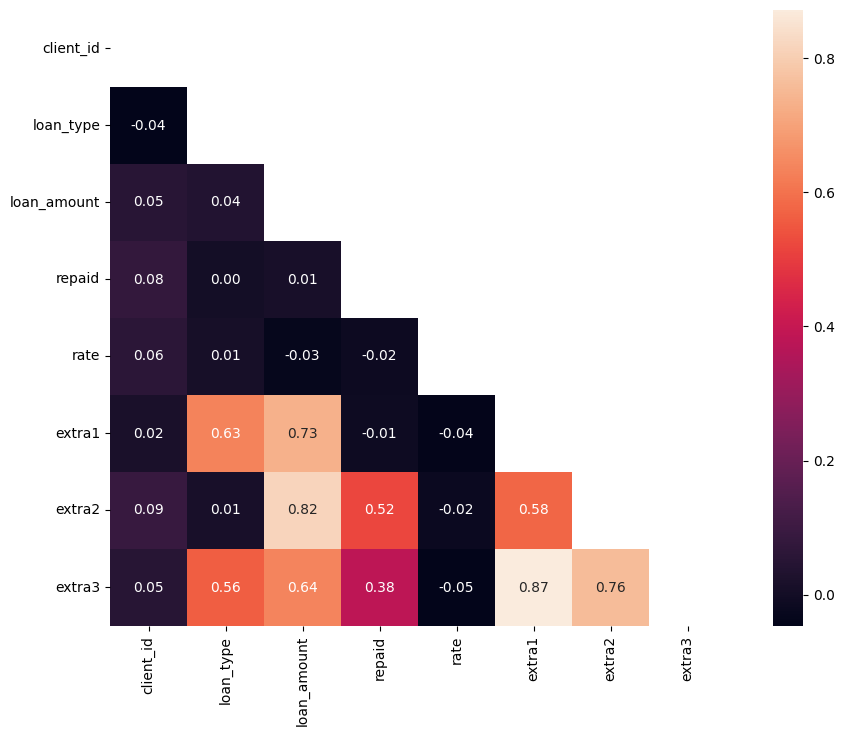

In [15]:
plt.figure(figsize=(12,8))
corr=df.corr()
mask=np.triu(corr)
sns.heatmap(corr,square=True,annot=True,mask=mask,fmt='.2f')
plt.show()

### **ساخت، آموزش و آزمون مدل به روش رگرسیون خطی تک متغیره**

In [16]:
X=df[['extra2']]
y=df['loan_amount']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
print(f"R_squared:{r2}")

R_squared:0.7212484183412967


### **ساخت، آموزش و آزمون مدل به روش رگرسیون خطی چند متغیره**

In [17]:
features=['extra1','extra2','extra3']
X=df[features]
y=df[['loan_amount']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
print(f"R_squared:{r2}")

R_squared:0.9648126610325565


  
### **ساخت، آموزش و آزمون مدل به روش رگرسیون چند جمله ای با درجه 2**

In [18]:
features=['extra1','extra2','extra3']
X=df[features]
y=df[['loan_amount']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)
model=LinearRegression()
pf=PolynomialFeatures(degree=2)
X_train_poly=pf.fit_transform(X_train)
X_test_poly=pf.fit_transform(X_test)
model.fit(X_train_poly,y_train)
print(model.score(X_test_poly,y_test))

0.9897827236015976


  
### **ساخت، آموزش و آزمون مدل به روش رگرسیون چند جمله ای با درجه 3**

In [19]:
features=['extra1','extra2','extra3']
X=df[features]
y=df[['loan_amount']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)
model=LinearRegression()
pf=PolynomialFeatures(degree=3)
X_train_poly=pf.fit_transform(X_train)
X_test_poly=pf.fit_transform(X_test)
model.fit(X_train_poly,y_train)
print(model.score(X_test_poly,y_test))

0.9968912735261163
